Read in file los.r4 which is Rowena's map of GNSS-modeled tectonic rates across San Andreas/branching faults in my area.

<br> Written 6-27-23.

***

In [1]:
# import stuff
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
%matplotlib  widget 

In [2]:
# whole subregion
dy = 3600
dx = 18000
# cropped area
x1 = 18000
x2 = 14000
y1 = 2100
y2 = 1000

In [3]:
# read in los.r4 file
fileName = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/v_mean/los.r4'
f1 = gdal.Open(fileName, gdal.GA_ReadOnly)
los = f1.ReadAsArray()
f1 = None
# convert to cm/yr 
los = los/10.0

In [4]:
# calculate average los disp over my cropped area to subtract it out
crop_los_mean = np.mean(los[y2:y1,x2:x1])
print('mean disp rate in cropped region: '+str(crop_los_mean))

1.7401793


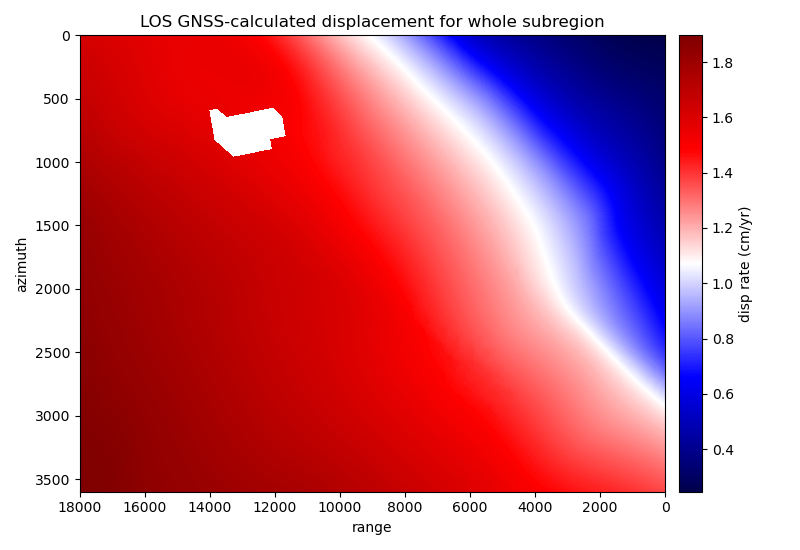

In [9]:
plt.figure(figsize=(8,5.5),tight_layout=True)
plt.imshow(los, aspect='auto',interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
plt.xlabel('range'); plt.ylabel('azimuth')
#plt.xticks([]); plt.yticks([])
plt.title('LOS GNSS-calculated displacement for whole subregion')
plt.show()

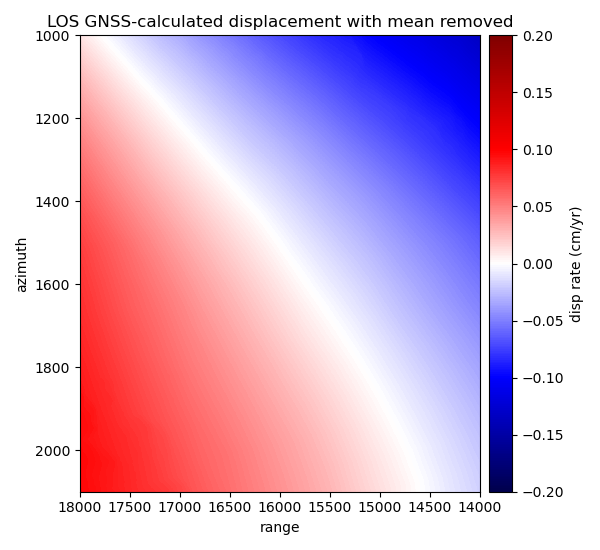

In [6]:
plt.figure(figsize=(6,5.5),tight_layout=True)
plt.imshow(los-crop_los_mean, aspect='auto',interpolation='nearest',vmin=-0.2,vmax=0.2)
plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
#plt.xlim([dx,0]); plt.ylim([dy,0])
plt.xlim([x1,x2]); plt.ylim([y1,y2])
plt.xlabel('range'); plt.ylabel('azimuth')
#plt.xticks([]); plt.yticks([])
plt.title('LOS GNSS-calculated displacement with mean removed')
plt.show()